In [1]:
from google.colab import drive
drive.mount('/content/GoogleDrive')

Mounted at /content/GoogleDrive


In [2]:
import pandas as pd
data_original = pd.read_csv(r"/content/GoogleDrive/MyDrive/data/data3.csv")

In [3]:
data_original.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,average_frac_fluid_per_stage,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,58668.064664,0.153584,6.561970,1.0,36.0,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,52966.647786,0.201391,4.965455,1.0,33.4,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,135118.626100,0.176741,5.658008,1.0,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,39792.129530,0.244176,4.095414,1.0,40.0,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,52966.647786,0.181049,5.523377,1.0,28.6,1379546.414,705150.7519,1379987.487,707123.7258,102.309540


In [4]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19306 entries, 0 to 19305
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19306 non-null  int64  
 1   0                             19306 non-null  float64
 2   1                             19306 non-null  float64
 3   2                             19306 non-null  float64
 4   3                             19306 non-null  float64
 5   4                             19306 non-null  float64
 6   5                             19306 non-null  float64
 7   6                             19306 non-null  float64
 8   7                             19306 non-null  float64
 9   8                             19306 non-null  float64
 10  9                             19306 non-null  float64
 11  10                            19306 non-null  float64
 12  11                            19306 non-null  float64
 13  1

In [5]:
data_original.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', 'surface_x',
       'surface_y', 'bh_x', 'bh_y', 'gross_perforated_length',
       'number_of_stages', 'total_proppant', 'total_fluid',
       'true_vertical_depth', 'proppant_intensity', 'frac_fluid_intensity',
       'average_stage_length', 'average_proppant_per_stage',
       'average_frac_fluid_per_stage', 'proppant_to_frac_fluid_ratio',
       'frac_fluid_to_proppant_ratio', 'bin_lateral_length', 'frac_seasoning',
       'horizontal_midpoint_x', 'horizontal_midpoint_y', 'horizontal_toe_x',
       'horizontal_toe_y', 'OilPeakRate'],
      dtype='object')

Reserve those features with Z-score>2 in the Model_EmptyValKNNFilled.ipynb file, and drop the others

In [6]:
data_original.drop(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', 'surface_x',
       'surface_y', 'bh_x', 'bh_y', 'average_frac_fluid_per_stage', 'proppant_to_frac_fluid_ratio',
       'frac_fluid_to_proppant_ratio', 'bin_lateral_length',
       'horizontal_midpoint_x', 'horizontal_midpoint_y', 'horizontal_toe_x',
       'horizontal_toe_y'], axis=1, inplace=True)

Remove the outliers

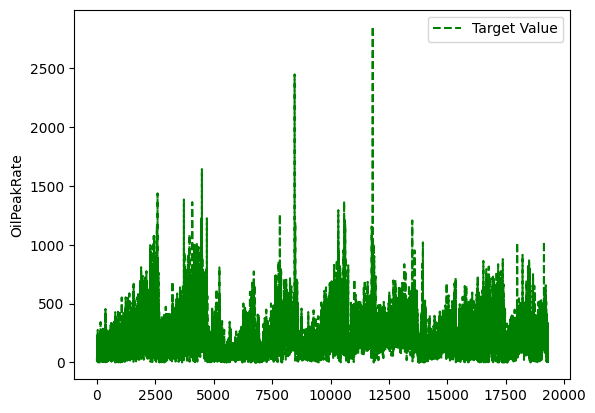

In [20]:
datapoints = range(0,19306)
import matplotlib.pyplot as plt

plt.plot(datapoints, data_original["OilPeakRate"], '--', color='green', label='Target Value')


plt.ylabel('OilPeakRate')
plt.legend()
plt.show()

In [21]:
Q1 = data_original["OilPeakRate"].quantile(0.25)
Q3 = data_original["OilPeakRate"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = data_original[(data_original["OilPeakRate"] < Q1 - threshold * IQR) | (data_original["OilPeakRate"] > Q3 + threshold * IQR)]

In [22]:
data = data_original.drop(outliers.index)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18800 entries, 0 to 19305
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gross_perforated_length     18800 non-null  float64
 1   number_of_stages            18800 non-null  float64
 2   total_proppant              18800 non-null  float64
 3   total_fluid                 18800 non-null  float64
 4   true_vertical_depth         18800 non-null  float64
 5   proppant_intensity          18800 non-null  float64
 6   frac_fluid_intensity        18800 non-null  float64
 7   average_stage_length        18800 non-null  float64
 8   average_proppant_per_stage  18800 non-null  float64
 9   frac_seasoning              18800 non-null  float64
 10  OilPeakRate                 18800 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


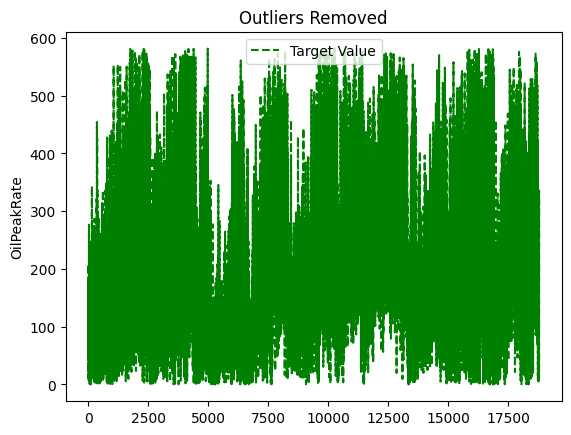

In [24]:
datapoints = range(0,18800)
import matplotlib.pyplot as plt

plt.plot(datapoints, data["OilPeakRate"], '--', color='green', label='Target Value')

plt.title("Outliers Removed")
plt.ylabel('OilPeakRate')
plt.legend()
plt.show()

In [25]:
data.to_csv('/content/GoogleDrive/MyDrive/data/data5.csv')

In [27]:
data.describe()

,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,frac_fluid_intensity,average_stage_length,average_proppant_per_stage,frac_seasoning,OilPeakRate
count,18800.000000,18800.000000,1.880000e+04,1.880000e+04,18800.000000,18800.000000,18800.000000,18800.000000,18800.000000,18800.000000,18800.000000
mean,6291.731057,28.757096,7.227176e+05,3.809308e+06,8785.210419,108.174687,560.295833,244.895317,22184.499643,50.921149,205.883733
std,2354.186073,12.931166,8.347284e+05,2.642018e+06,1848.664882,148.935327,293.957135,70.246626,6875.926065,58.394071,128.015076
min,396.653543,2.000000,0.000000e+00,6.642858e+02,1994.094488,0.000000,0.132962,98.747624,94.857143,0.000000,0.011905
25%,4292.322835,17.200000,3.301150e+05,1.675257e+06,7641.486220,69.644422,341.558303,196.347105,18100.070504,25.600000,105.559838
50%,6141.732283,28.200000,6.613055e+05,3.387306e+06,9046.259843,107.233662,563.824864,226.262498,21992.363581,40.000000,188.583363
75%,7821.112205,39.000000,1.016429e+06,5.487929e+06,10201.771650,142.160782,747.650989,276.796817,26608.515987,61.000000,287.860263
max,15500.000000,70.000000,9.109073e+07,3.442402e+07,13257.874020,18203.812980,5901.923870,734.580053,67516.992480,4827.000000,581.784971


In [28]:
corr_matrix = data_original.corr()
corr_matrix

,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,frac_fluid_intensity,average_stage_length,average_proppant_per_stage,frac_seasoning,OilPeakRate
gross_perforated_length,1.000000,0.748517,0.428873,0.768069,0.010856,0.120721,0.390870,-0.396099,0.435079,0.084943,0.404049
number_of_stages,0.748517,1.000000,0.452670,0.794041,0.149757,0.213851,0.617721,-0.705823,0.453255,0.093673,0.417932
total_proppant,0.428873,0.452670,1.000000,0.482871,0.123287,0.935164,0.378393,-0.305712,0.425981,0.052560,0.282176
total_fluid,0.768069,0.794041,0.482871,1.000000,0.181485,0.218424,0.834516,-0.522974,0.583364,0.123411,0.448804
true_vertical_depth,0.010856,0.149757,0.123287,0.181485,1.000000,0.133488,0.308441,-0.306872,0.387998,-0.013927,0.384662
proppant_intensity,0.120721,0.213851,0.935164,0.218424,0.133488,1.000000,0.261661,-0.202613,0.294107,0.017970,0.155335
frac_fluid_intensity,0.390870,0.617721,0.378393,0.834516,0.308441,0.261661,1.000000,-0.563529,0.589541,0.120874,0.376682
average_stage_length,-0.396099,-0.705823,-0.305712,-0.522974,-0.306872,-0.202613,-0.563529,1.000000,-0.402913,-0.055222,-0.333001
average_proppant_per_stage,0.435079,0.453255,0.425981,0.583364,0.387998,0.294107,0.589541,-0.402913,1.000000,0.058496,0.463957
frac_seasoning,0.084943,0.093673,0.052560,0.123411,-0.013927,0.017970,0.120874,-0.055222,0.058496,1.000000,-0.012228


In [29]:
corr_matrix['OilPeakRate'].sort_values(ascending=False)

OilPeakRate                   1.000000
average_proppant_per_stage    0.463957
total_fluid                   0.448804
number_of_stages              0.417932
gross_perforated_length       0.404049
true_vertical_depth           0.384662
frac_fluid_intensity          0.376682
total_proppant                0.282176
proppant_intensity            0.155335
frac_seasoning               -0.012228
average_stage_length         -0.333001
Name: OilPeakRate, dtype: float64

In [31]:
data.shape

(18800, 11)

In [32]:
X = data.drop("OilPeakRate", axis=1).copy()
y = data["OilPeakRate"].copy()

In [33]:
from sklearn.model_selection import train_test_split

train_i, test_i, train_i_labels, test_i_labels = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
train_i.shape

(12596, 10)

In [35]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
train_i.columns = train_i.columns.astype(str)
test_i.columns = test_i.columns.astype(str)
train_i_scaled = std_scaler.fit_transform(train_i)
test_i_scaled = std_scaler.fit_transform(test_i)

In [36]:
def accuracy(data_labels, y_pred):
  count = 0
  for i in range(len(y_pred)):
    if y_pred[i] >= data_labels[i] * 0.9 and y_pred[i] <= data_labels[i] * 1.1:
      count += 1
  return count/len(y_pred)

  Linear Model

In [37]:
def Z_score(X_train, y_true, y_pred, beta_hat):
    '''
    Returns the Z-scores of the model with coefficients beta_hat.
    The data is encoded in X_train and y_true:
        X_train is a (numpy) array (N, p + 1), where p is the number of predictors.
        y_true is a vector of length N.
    y_pred ia vector of length N, and is the prediction of the model on X.
    '''
    N = len(y_true)
    p = X_train.shape[1] - 1
    variance_y_est = (1/(N-p-1)) * np.sum(np.square(y_true - y_pred)) # Estimative of the variance of y.
    diag = np.diag(np.linalg.inv(np.matmul(np.transpose(X_train),X_train))) # Diagonal of (X^t X)^{-1}.
    Z = (1/np.sqrt(variance_y_est)) * np.multiply(beta_hat, np.sqrt(1/diag))
    return Z

In [38]:
import numpy as np

In [40]:
X1 = data.drop("OilPeakRate", axis=1).copy()
y1 = data["OilPeakRate"].copy()

In [41]:
from sklearn.model_selection import train_test_split

train1_i, test1_i, train1_i_labels, test1_i_labels = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [42]:
from sklearn.metrics import mean_squared_error
test_accuracy = []
train_accuracy = []
mse = []
for i in range(5):
  from sklearn.linear_model import LinearRegression
  lin_reg = LinearRegression()
  lin_reg.fit(train1_i, train1_i_labels)
  test_predictions = lin_reg.predict(test1_i)
  train_prediction = lin_reg.predict(train1_i)
  print("fold", i)
  print("test_accuracy", accuracy(test1_i_labels.to_list(), np.array(test_predictions)))
  test_accuracy.append(accuracy(test1_i_labels.to_list(), np.array(test_predictions)))
  print("train_accuracy", accuracy(train1_i_labels.to_list(), np.array(train_prediction)))
  train_accuracy.append(accuracy(train1_i_labels.to_list(), np.array(train_prediction)))
  print("mse is ", mean_squared_error(train1_i_labels, train_prediction, squared=False))
  mse.append(mean_squared_error(train1_i_labels, train_prediction, squared=False))
      # The predicted values of y on the training set.
  y_pred = lin_reg.predict(train1_i)

  # prepare beta
  beta_hat = lin_reg.coef_
  beta_hat = np.concatenate([np.array([lin_reg.intercept_]), beta_hat])

  # prepare X
  column_of_ones = np.ones((train_i.shape[0],1))
  X = np.concatenate([column_of_ones, train1_i], axis = 1)

  # Z-scores
  columns = ['Intercept'] + train1_i.columns.to_list()
  Zscores = np.array([Z_score(X, train1_i_labels.to_numpy(), y_pred, beta_hat)])
  Zscores_df = pd.DataFrame(data=Zscores, columns=columns, index=['Z-score'] )
  pd.set_option('display.max_columns', None)
  print(Zscores_df)

print("average test_accuracy", sum(test_accuracy)/ len(test_accuracy))
print("average train_accuracy", sum(train_accuracy)/ len(train_accuracy))
print("mse", sum(mse)/ len(mse))

fold 0
test_accuracy 0.15635074145712444
train_accuracy 0.14973007303906002
mse is  102.21659291453047
         Intercept  gross_perforated_length  number_of_stages  total_proppant  \
Z-score -12.999168                10.003742          7.422126       -2.043882   

         total_fluid  true_vertical_depth  proppant_intensity  \
Z-score     4.738326            36.065632            2.110236   

         frac_fluid_intensity  average_stage_length  \
Z-score             -1.562166              0.118262   

         average_proppant_per_stage  frac_seasoning  
Z-score                   15.810305       -9.135754  
fold 1
test_accuracy 0.15635074145712444
train_accuracy 0.14973007303906002
mse is  102.21659291453047
         Intercept  gross_perforated_length  number_of_stages  total_proppant  \
Z-score -12.999168                10.003742          7.422126       -2.043882   

         total_fluid  true_vertical_depth  proppant_intensity  \
Z-score     4.738326            36.065632            

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_i, train_i_labels)
test_predictions = lin_reg.predict(test_i)
train_prediction = lin_reg.predict(train_i)
print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.14973007303906002
test_accuracy 0.15635074145712444
mse_train is  102.21659291453047
mse_test is  102.76782813512202


Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_i, train_i_labels)
test_predictions = tree_reg.predict(test_i)
train_prediction = tree_reg.predict(train_i)
print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 1.0
test_accuracy 0.13974854932301742
mse_train is  8.772522527944912e-16
mse_test is  126.85949304645794


Decision model 1

In [46]:
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(train_i, train_i_labels)
test_predictions = tree_reg.predict(test_i)
train_prediction = tree_reg.predict(train_i)
print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.1611622737376945
test_accuracy 0.16295938104448743
mse_train is  99.18947629698219
mse_test is  101.0360008243836


Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=250, random_state=42)
forest_reg.fit(train_i, train_i_labels)
test_predictions = forest_reg.predict(test_i)
train_prediction = forest_reg.predict(train_i)

print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.4768180374722134
test_accuracy 0.188749194068343
mse_train is  33.569433804566685
mse_test is  91.52713964090576


RandomForest Model2

In [48]:
forest_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
forest_reg.fit(train_i, train_i_labels)
test_predictions = forest_reg.predict(test_i)
train_prediction = forest_reg.predict(train_i)

print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.47483328040647826
test_accuracy 0.18697614442295293
mse_train is  33.4254775160721
mse_test is  91.38958151760765


In [49]:
for score, name in zip(forest_reg.feature_importances_, train_i.columns):
  print(round(score,2), name)

0.12 gross_perforated_length
0.05 number_of_stages
0.12 total_proppant
0.06 total_fluid
0.19 true_vertical_depth
0.22 proppant_intensity
0.05 frac_fluid_intensity
0.06 average_stage_length
0.07 average_proppant_per_stage
0.06 frac_seasoning


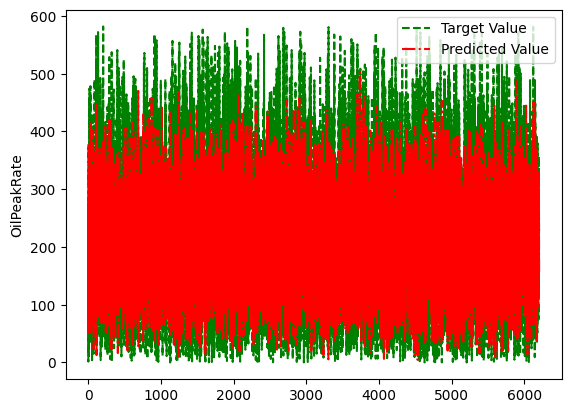

In [52]:
datapoints = range(0,6204)
import matplotlib.pyplot as plt

plt.plot(datapoints, test_i_labels, '--', color='green', label='Target Value')
plt.plot(datapoints, test_predictions, '-.', color='red', label='Predicted Value')


plt.ylabel('OilPeakRate')
plt.legend()
plt.show()

KNN model

In [54]:
from sklearn.neighbors import KNeighborsRegressor
KNN_reg = KNeighborsRegressor(n_neighbors=10)
KNN_reg.fit(train_i, train_i_labels)
test_predictions = KNN_reg.predict(test_i)
train_prediction = KNN_reg.predict(train_i)

print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.15425531914893617
test_accuracy 0.14168278529980657
mse_train is  100.47528513938336
mse_test is  111.2548538738006


Voting Regression

In [56]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
voting_clf = VotingRegressor(
estimators=[('lr', LinearRegression()),
            ('rf', RandomForestRegressor(n_estimators=1000, max_features=5, n_jobs=-1, random_state=42)),
            ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
            ('knn', KNeighborsRegressor(n_neighbors=10)),
             ('svr', SVR())],
)
voting_clf.fit(train_i, train_i_labels)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(max_features=5,
                                                   n_estimators=1000, n_jobs=-1,
                                                   random_state=42)),
                            ('dt',
                             DecisionTreeRegressor(max_depth=5,
                                                   random_state=42)),
                            ('knn', KNeighborsRegressor(n_neighbors=10)),
                            ('svr', SVR())])

In [57]:
test_predictions = voting_clf.predict(test_i)
train_prediction = voting_clf.predict(train_i)

print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.1805335026992696
test_accuracy 0.16892327530625403
mse_train is  85.10285871559758
mse_test is  98.13710860762995


Neural Network

In [58]:
train_i_scaled_copy = train_i_scaled.copy()
test_i_scaled_copy = test_i_scaled.copy()

In [59]:
column_name = list(data.drop("OilPeakRate", axis=1).copy().columns)
train_i_scaled = pd.DataFrame(train_i_scaled, columns=column_name)
test_i_scaled = pd.DataFrame(test_i_scaled, columns=column_name)

In [60]:
train_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12596 entries, 12958 to 16227
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gross_perforated_length     12596 non-null  float64
 1   number_of_stages            12596 non-null  float64
 2   total_proppant              12596 non-null  float64
 3   total_fluid                 12596 non-null  float64
 4   true_vertical_depth         12596 non-null  float64
 5   proppant_intensity          12596 non-null  float64
 6   frac_fluid_intensity        12596 non-null  float64
 7   average_stage_length        12596 non-null  float64
 8   average_proppant_per_stage  12596 non-null  float64
 9   frac_seasoning              12596 non-null  float64
dtypes: float64(10)
memory usage: 1.1 MB


In [61]:
import sklearn.model_selection as ms
## Add from TensorFlow
import tensorflow as tf
from tensorflow import keras
from keras import layers
%matplotlib inline

In [62]:
initializer = tf.keras.initializers.HeUniform(seed=42)
model = keras.Sequential([
               keras.Input(shape=(10,)),
               layers.Dense(10, activation="relu", kernel_initializer=initializer),
               layers.Dense(10, activation="relu", kernel_initializer=initializer),
               layers.Dense(1, activation="linear", kernel_initializer=initializer)])
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam',
              loss="mse",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
print('------------------------------------------------------------------------')

history = model.fit(train_i_scaled, train_i_labels, epochs=200, batch_size=100)
# Generate generalization metrics
scores_test = model.evaluate(test_i_scaled, test_i_labels, verbose=0)
scores_train = model.evaluate(train_i_scaled, train_i_labels, verbose=0)
print(f'> - rmse_train: {scores_train[1]} - rmse_test: {scores_test[1]}')
test_predictions = model.predict(test_i_scaled).reshape((-1,)).tolist()
train_prediction = model.predict(train_i_scaled).reshape((-1,)).tolist()
acc_test = accuracy(test_i_labels.to_list(), np.array(test_predictions))
acc_train = accuracy(train_i_labels.to_list(), np.array(train_prediction))
print(f'> - train_accuracy: {acc_train} - test_accuracy: {acc_test}')

------------------------------------------------------------------------
Epoch 1/200
126/126 [==============================] - 1s 2ms/step - loss: 58350.0742 - root_mean_squared_error: 241.5576
Epoch 2/200
126/126 [==============================] - 0s 2ms/step - loss: 56010.9023 - root_mean_squared_error: 236.6662
Epoch 3/200
126/126 [==============================] - 0s 2ms/step - loss: 48953.4805 - root_mean_squared_error: 221.2543
Epoch 4/200
126/126 [==============================] - 0s 2ms/step - loss: 36775.2852 - root_mean_squared_error: 191.7688
Epoch 5/200
126/126 [==============================] - 0s 2ms/step - loss: 25624.5742 - root_mean_squared_error: 160.0768
Epoch 6/200
126/126 [==============================] - 0s 2ms/step - loss: 19545.6191 - root_mean_squared_error: 139.8056
Epoch 7/200
126/126 [==============================] - 0s 2ms/step - loss: 16978.4531 - root_mean_squared_error: 130.3014
Epoch 8/200
126/126 [==============================] - 0s 2ms/step - loss

In [63]:
def build_model(hp):
 n_hidden = hp.Int("n_hidden", min_value=0, max_value=6, default=2)
 n_neurons = hp.Int("n_neurons", min_value=10, max_value=50)
 learning_rate = hp.Float("learning_rate", min_value=5e-5, max_value=5e-4, sampling='log')
 optimizer = hp.Choice("optimizer", values=['sgd', 'adam'])
 if optimizer == 'sgd':
  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
 else:
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

 model = keras.models.Sequential()
 initializer = tf.keras.initializers.HeUniform(seed=42)
 for _ in range(n_hidden):
  model.add(layers.Dense(n_neurons, activation="relu", kernel_initializer=initializer))
 model.add(layers.Dense(1, activation="linear"))
 model.compile(loss="mse", optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])
 return model

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(train_i_scaled, train_i_labels, test_size=0.3, random_state=42)

In [65]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.5 MB/s eta 0:00:00


In [66]:
import keras_tuner as kt
random_search_tuner = kt.RandomSearch(
    build_model, objective=kt.Objective('val_root_mean_squared_error', direction='min'), max_trials=5, overwrite=True, directory="chevron_projection", project_name="my_rnd_search", seed=42
)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=100)

Trial 5 Complete [00h 00m 09s]
val_root_mean_squared_error: 99.96516418457031

Best val_root_mean_squared_error So Far: 99.96516418457031
Total elapsed time: 00h 00m 55s


In [71]:
top3_params = random_search_tuner.get_best_models(num_models=3)
best_model = top3_params[0]

In [72]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 4,
 'n_neurons': 19,
 'learning_rate': 0.00010157264435346854,
 'optimizer': 'sgd'}

In [73]:
history = best_model.fit(train_i_scaled, train_i_labels, epochs=200, batch_size=100)
# Generate generalization metrics
scores_test = model.evaluate(test_i_scaled, test_i_labels, verbose=0)
scores_train = model.evaluate(train_i_scaled, train_i_labels, verbose=0)
print(f'> - rmse_train: {scores_train[1]} - rmse_test: {scores_test[1]}')
test_predictions = model.predict(test_i_scaled).reshape((-1,)).tolist()
train_prediction = model.predict(train_i_scaled).reshape((-1,)).tolist()
acc_test = accuracy(test_i_labels.to_list(), np.array(test_predictions))
acc_train = accuracy(train_i_labels.to_list(), np.array(train_prediction))
print(f'> - train_accuracy: {acc_train} - test_accuracy: {acc_test}')

Epoch 1/200
126/126 [==============================] - 1s 2ms/step - loss: 10317.5010 - root_mean_squared_error: 101.5751
Epoch 2/200
126/126 [==============================] - 0s 2ms/step - loss: 10220.2041 - root_mean_squared_error: 101.0950
Epoch 3/200
126/126 [==============================] - 0s 2ms/step - loss: 10147.1250 - root_mean_squared_error: 100.7329
Epoch 4/200
126/126 [==============================] - 0s 2ms/step - loss: 10028.1328 - root_mean_squared_error: 100.1406
Epoch 5/200
126/126 [==============================] - 0s 2ms/step - loss: 10212.1641 - root_mean_squared_error: 101.0553
Epoch 6/200
126/126 [==============================] - 0s 2ms/step - loss: 10104.4531 - root_mean_squared_error: 100.5209
Epoch 7/200
126/126 [==============================] - 0s 2ms/step - loss: 9988.6436 - root_mean_squared_error: 99.9432
Epoch 8/200
126/126 [==============================] - 0s 2ms/step - loss: 9945.3154 - root_mean_squared_error: 99.7262
Epoch 9/200
126/126 [=======

In [74]:
test_i_scaled.shape

(6204, 10)

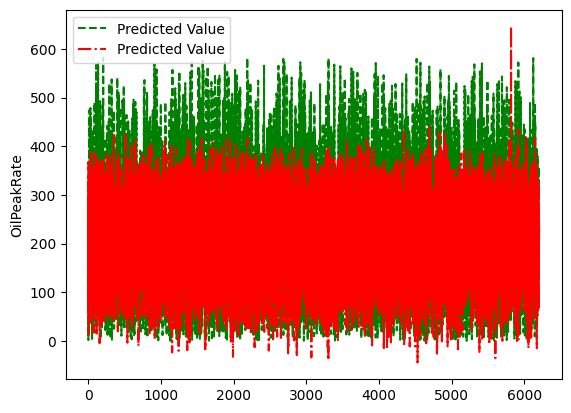

In [75]:
datapoints = range(0,6204)
import matplotlib.pyplot as plt

plt.plot(datapoints, test_i_labels, '--', color='green', label='Predicted Value')
plt.plot(datapoints, test_predictions, '-.', color='red', label='Predicted Value')


plt.ylabel('OilPeakRate')
plt.legend()
plt.show()